In [1]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import pickle as pkl
import random
from scipy.signal import savgol_filter

def getIkFromCount(allCount,kRange,d,offset):
    completeness = [100.0*x/d for x in kRange]
    Ik = np.mean(np.log2(allCount),axis=0)
    Ik = [offset - x for x in Ik]
    return [completeness,Ik]

In [2]:
allIk = pkl.load(open("Chunker_d10_seq100_rep1000.pkl"))
NumExp = 1000
NumSeq = 100
seqlength = 10
b2 = np.empty([allIk.shape[0],allIk.shape[1]-1])
for i in range(0,allIk.shape[0]):
    for j in range(1,allIk.shape[1]):
        b2[i,j-1] = allIk[i,j-1]-allIk[i,j]

In [3]:
# allIk2 = pkl.load(open("Chunker_d20_seq100_rep1000.pkl"))
# NumExp2 = 1000
# NumSeq2 = 100
# seqlength2 = 20
# b22 = np.empty([allIk2.shape[0],allIk2.shape[1]-1])
# for i in range(0,allIk2.shape[0]):
#     for j in range(1,allIk2.shape[1]):
#         b22[i,j-1] = allIk2[i,j-1]-allIk2[i,j]

In [4]:
num_topo_all = pkl.load(open("N10-rep2000.pkl"))
num_nodes = 10
num_edges = range(5,46)
b = np.empty([num_topo_all.shape[0],num_topo_all.shape[1]-1])
for i in range(0,num_topo_all.shape[0]):
    for j in range(1,num_topo_all.shape[1]):
        b[i,j-1] = math.log(1.0*num_topo_all[i,j-1]/num_topo_all[i,j],2)

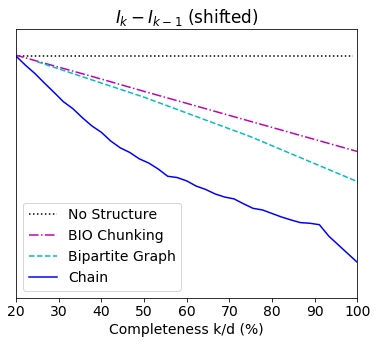

In [29]:
plt.figure(figsize=(6,5))
maxnum = 10
srl_offset = -1.6
chunker_offset = -0.745
default_offset = 0.72

plt.plot(range(100), [default_offset]*100,'k:')
plt.plot([100.0*x/seqlength for x in range(1,seqlength+1)],[t+chunker_offset for t in savgol_filter(np.mean(b2,axis=0),7,1)],'m-.') # chunker
d = 4
x = range(0,10)
y = [-math.log(math.factorial(maxnum-t)) for t in x]
y = np.diff(y)
plt.plot([100.0*t/d for t in x[1:]],[t+srl_offset for t in y],'c--') # srl
plt.plot([2.0*e/num_nodes/(num_nodes-1)*100 for e in num_edges[1:]],savgol_filter(np.mean(b,axis=0),7,1),'b-') # DAG

plt.legend(["No Structure","BIO Chunking","Bipartite Graph","Chain"])
plt.xlabel("Completeness k/d (%)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$")
plt.tight_layout()

plt.xlabel("Completeness k/d (%)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$ (shifted)")
plt.ylim(ymin=0,ymax=0.8)
plt.xlim((20,100))
plt.rcParams.update({'font.size':14})
plt.tight_layout()
plt.gca().axes.get_yaxis().set_visible(False)
plt.savefig("AllCompare.pdf")
plt.show()

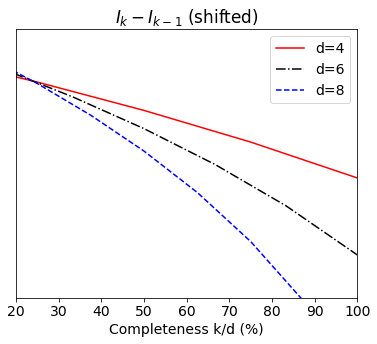

In [33]:
plt.figure(figsize=(6,5))
maxnum = 10
srl_offset = 0.05

d = 4
x = range(-3,10)
y = [-math.log(math.factorial(maxnum-t)) for t in x]
y = np.diff(y)
plt.plot([100.0*t/d for t in x[1:]],[t for t in y],'r') # srl

d = 6
x = range(-3,10)
y = [-math.log(math.factorial(maxnum-t)) for t in x]
y = np.diff(y)
plt.plot([100.0*t/d for t in x[1:]],[t+srl_offset for t in y],'k-.') # srl

d = 8
x = range(-3,10)
y = [-math.log(math.factorial(maxnum-t)) for t in x]
y = np.diff(y)
plt.plot([100.0*t/d for t in x[1:]],[t+0.1 for t in y],'b--') # srl

plt.legend(["d=4","d=6","d=8"])
plt.xlabel("Completeness k/d (%)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$")
plt.tight_layout()

plt.xlabel("Completeness k/d (%)")
plt.ylabel("bit")
plt.title("$I_{k}-I_{k-1}$ (shifted)")
plt.ylim(ymin=1.5,ymax=2.5)
plt.xlim((20,100))
plt.rcParams.update({'font.size':14})
plt.tight_layout()
plt.gca().axes.get_yaxis().set_visible(False)
plt.savefig("SRC_diff_argnum.pdf")
plt.show()